In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)


In [4]:
df = pd.read_csv(
    r"C:\Users\ds12\College\ML-Assignments\Data Sets\MLK\cars_data.csv"
)


In [5]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [6]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
df.isna().sum().sort_values(ascending=False)

Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Make                    0
Model                   0
Year                    0
Transmission Type       0
Driven_Wheels           0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Cleaning the Data

In [9]:
df.drop(["Market Category", "Model",'Make'], axis=1, inplace=True)

In [10]:
for i in list(df.columns):
    print(i, df[i].unique())
    print("\n")


Year [2011 2012 2013 1992 1993 1994 2017 1991 2016 1990 2015 1996 1997 1998
 2014 1999 2002 2003 2004 1995 2007 2008 2009 2001 2010 2000 2005 2006]


Engine Fuel Type ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)' nan]


Engine HP [ 335.  300.  230.  320.  172.  160.  130.  158.  240.  248.  162.  217.
  184.  295.  115.  140.  155.  114.  100.  241.  180.  177.  228.  121.
  148.  194.  218.  161.  292.  250.  255.  222.   82.  134.  306.  400.
  425.  350.  332.  268.  282.  275.  201.  442.  562.  597.  237.  270.
  445.  443.  302.  322.  315.   nan  101.  135.  485.  238.  515.  543.
  631.  604.  620.  611.  661.  157.  402.  389.  110.  532.  170.  165.
  125.  641.  535.  153.  144.  188.  372.  108.  168.  190.  205.  200.
  227.  173.  220.  210.  280. 

In [11]:
df["Engine Fuel Type"].replace(
    np.nan, list(df["Engine Fuel Type"].mode())[0], inplace=True
)

df["Transmission Type"].replace(
    {"UNKNOWN": list(df["Transmission Type"].mode())[
        0], "DIRECT_DRIVE": "AUTOMATIC"},
    inplace=True,
)

df["Vehicle Style"].replace(
    {
        "Convertible": "Coupe",
        "4dr Hatchback": "Hatchback",
        "2dr Hatchback": "Hatchback",
        "4dr SUV": "SUV",
        "Passenger Minivan": "Minivan",
        "Cargo Minivan": "Minivan",
        "Crew Cab Pickup": "Van",
        "Regular Cab Pickup": "Van",
        "Extended Cab Pickup": "Van",
        "2dr SUV": "SUV",
        "Cargo Van": "Van",
        "Convertible SUV": "SUV",
        "Passenger Van": "Van",
    },
    inplace=True,
)

df["Driven_Wheels"].replace(
    "four wheel drive", "all wheel drive", inplace=True)

df["Engine Fuel Type"].replace(
    {
        "premium unleaded (required)": "unleaded",
        "premium unleaded (recommended)": "unleaded",
        "regular unleaded": "unleaded",
        "flex-fuel (unleaded/E85)": "flex-fuel",
        "flex-fuel (premium unleaded recommended/E85)": "flex-fuel",
        "flex-fuel (premium unleaded required/E85)": "flex-fuel",
        "flex-fuel (unleaded/natural gas)": "flex-fuel",
    },
    inplace=True,
)

df["Vehicle Size"].replace(
    {"Compact": 0, "Midsize": 1, "Large": 2}, inplace=True)

df["Number of Doors"].replace(
    np.nan, df["Number of Doors"].median(), inplace=True)
df["Number of Doors"] = df["Number of Doors"].astype(int)

df["Engine HP"].replace(np.nan, value=df["Engine HP"].mean(), inplace=True)

df["Engine Cylinders"].replace(
    np.nan, list(df["Engine Cylinders"].mode())[0], inplace=True
)
df["Engine Cylinders"] = df["Engine Cylinders"].astype(int)


<Axes: >

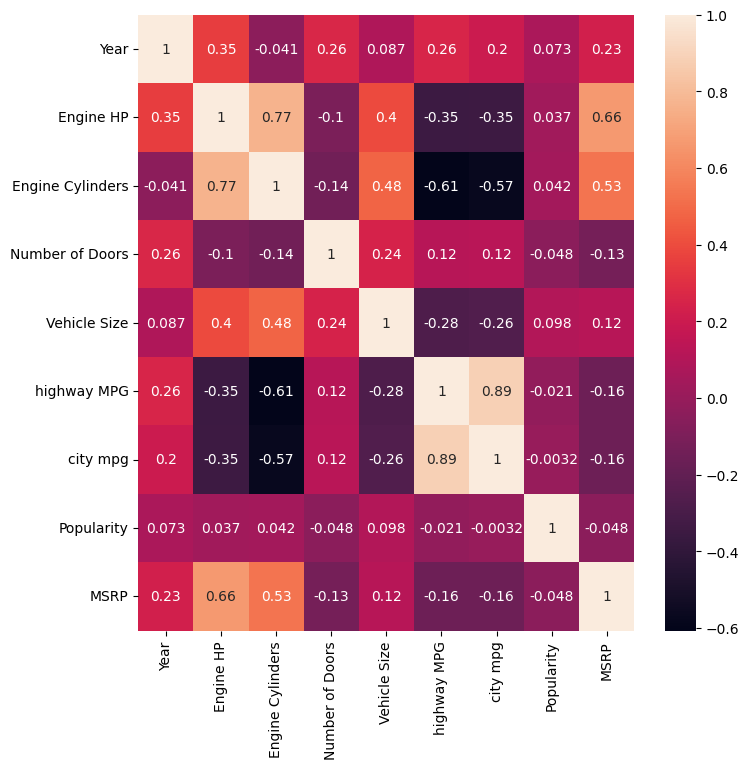

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)


In [13]:
for i in list(df.columns):
    if df[i].dtype == "O":
        print(i, df[i].unique())
        print("\n")
        

Engine Fuel Type ['unleaded' 'flex-fuel' 'diesel' 'electric' 'natural gas']


Transmission Type ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL']


Driven_Wheels ['rear wheel drive' 'front wheel drive' 'all wheel drive']


Vehicle Style ['Coupe' 'Sedan' 'Wagon' 'Hatchback' 'SUV' 'Minivan' 'Van']




In [14]:
df = pd.get_dummies(
    data=df,
    columns=['Year',"Engine Fuel Type", "Transmission Type",
            "Driven_Wheels", "Vehicle Style"],
    drop_first=True
)


In [15]:
df.head()

,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,MSRP,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel,Engine Fuel Type_natural gas,Engine Fuel Type_unleaded,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Style_Hatchback,Vehicle Style_Minivan,Vehicle Style_SUV,Vehicle Style_Sedan,Vehicle Style_Van,Vehicle Style_Wagon
0,335.0,6,2,0,26,19,3916,46135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
1,300.0,6,2,0,28,19,3916,40650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
2,300.0,6,2,0,28,20,3916,36350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
3,230.0,6,2,0,28,18,3916,29450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
4,230.0,6,2,0,28,18,3916,34500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0


In [16]:
df = df.loc[
:,['Engine HP', 'Engine Cylinders', 'Number of Doors', 'Vehicle Size',
    'highway MPG', 'city mpg', 'Popularity', 'Year_1991',
    'Year_1992', 'Year_1993', 'Year_1994', 'Year_1995', 'Year_1996',
    'Year_1997', 'Year_1998', 'Year_1999', 'Year_2000', 'Year_2001',
    'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006',
    'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011',
    'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
    'Year_2017', 'Engine Fuel Type_electric', 'Engine Fuel Type_flex-fuel',
    'Engine Fuel Type_natural gas', 'Engine Fuel Type_unleaded',
    'Transmission Type_AUTOMATIC', 'Transmission Type_MANUAL',
    'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
    'Vehicle Style_Hatchback', 'Vehicle Style_Minivan', 'Vehicle Style_SUV',
    'Vehicle Style_Sedan', 'Vehicle Style_Van', 'Vehicle Style_Wagon','MSRP']
]

In [17]:
df.head()

,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel,Engine Fuel Type_natural gas,Engine Fuel Type_unleaded,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Style_Hatchback,Vehicle Style_Minivan,Vehicle Style_SUV,Vehicle Style_Sedan,Vehicle Style_Van,Vehicle Style_Wagon,MSRP
0,335.0,6,2,0,26,19,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,46135
1,300.0,6,2,0,28,19,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,40650
2,300.0,6,2,0,28,20,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,36350
3,230.0,6,2,0,28,18,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,29450
4,230.0,6,2,0,28,18,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,34500


In [18]:
cleancars = df.copy(deep=True)

In [19]:
cleancars.to_csv(r"C:\Users\ds12\College\ML-Assignments\Data Sets\MLK\cleancars.csv", index=False)


<Axes: >

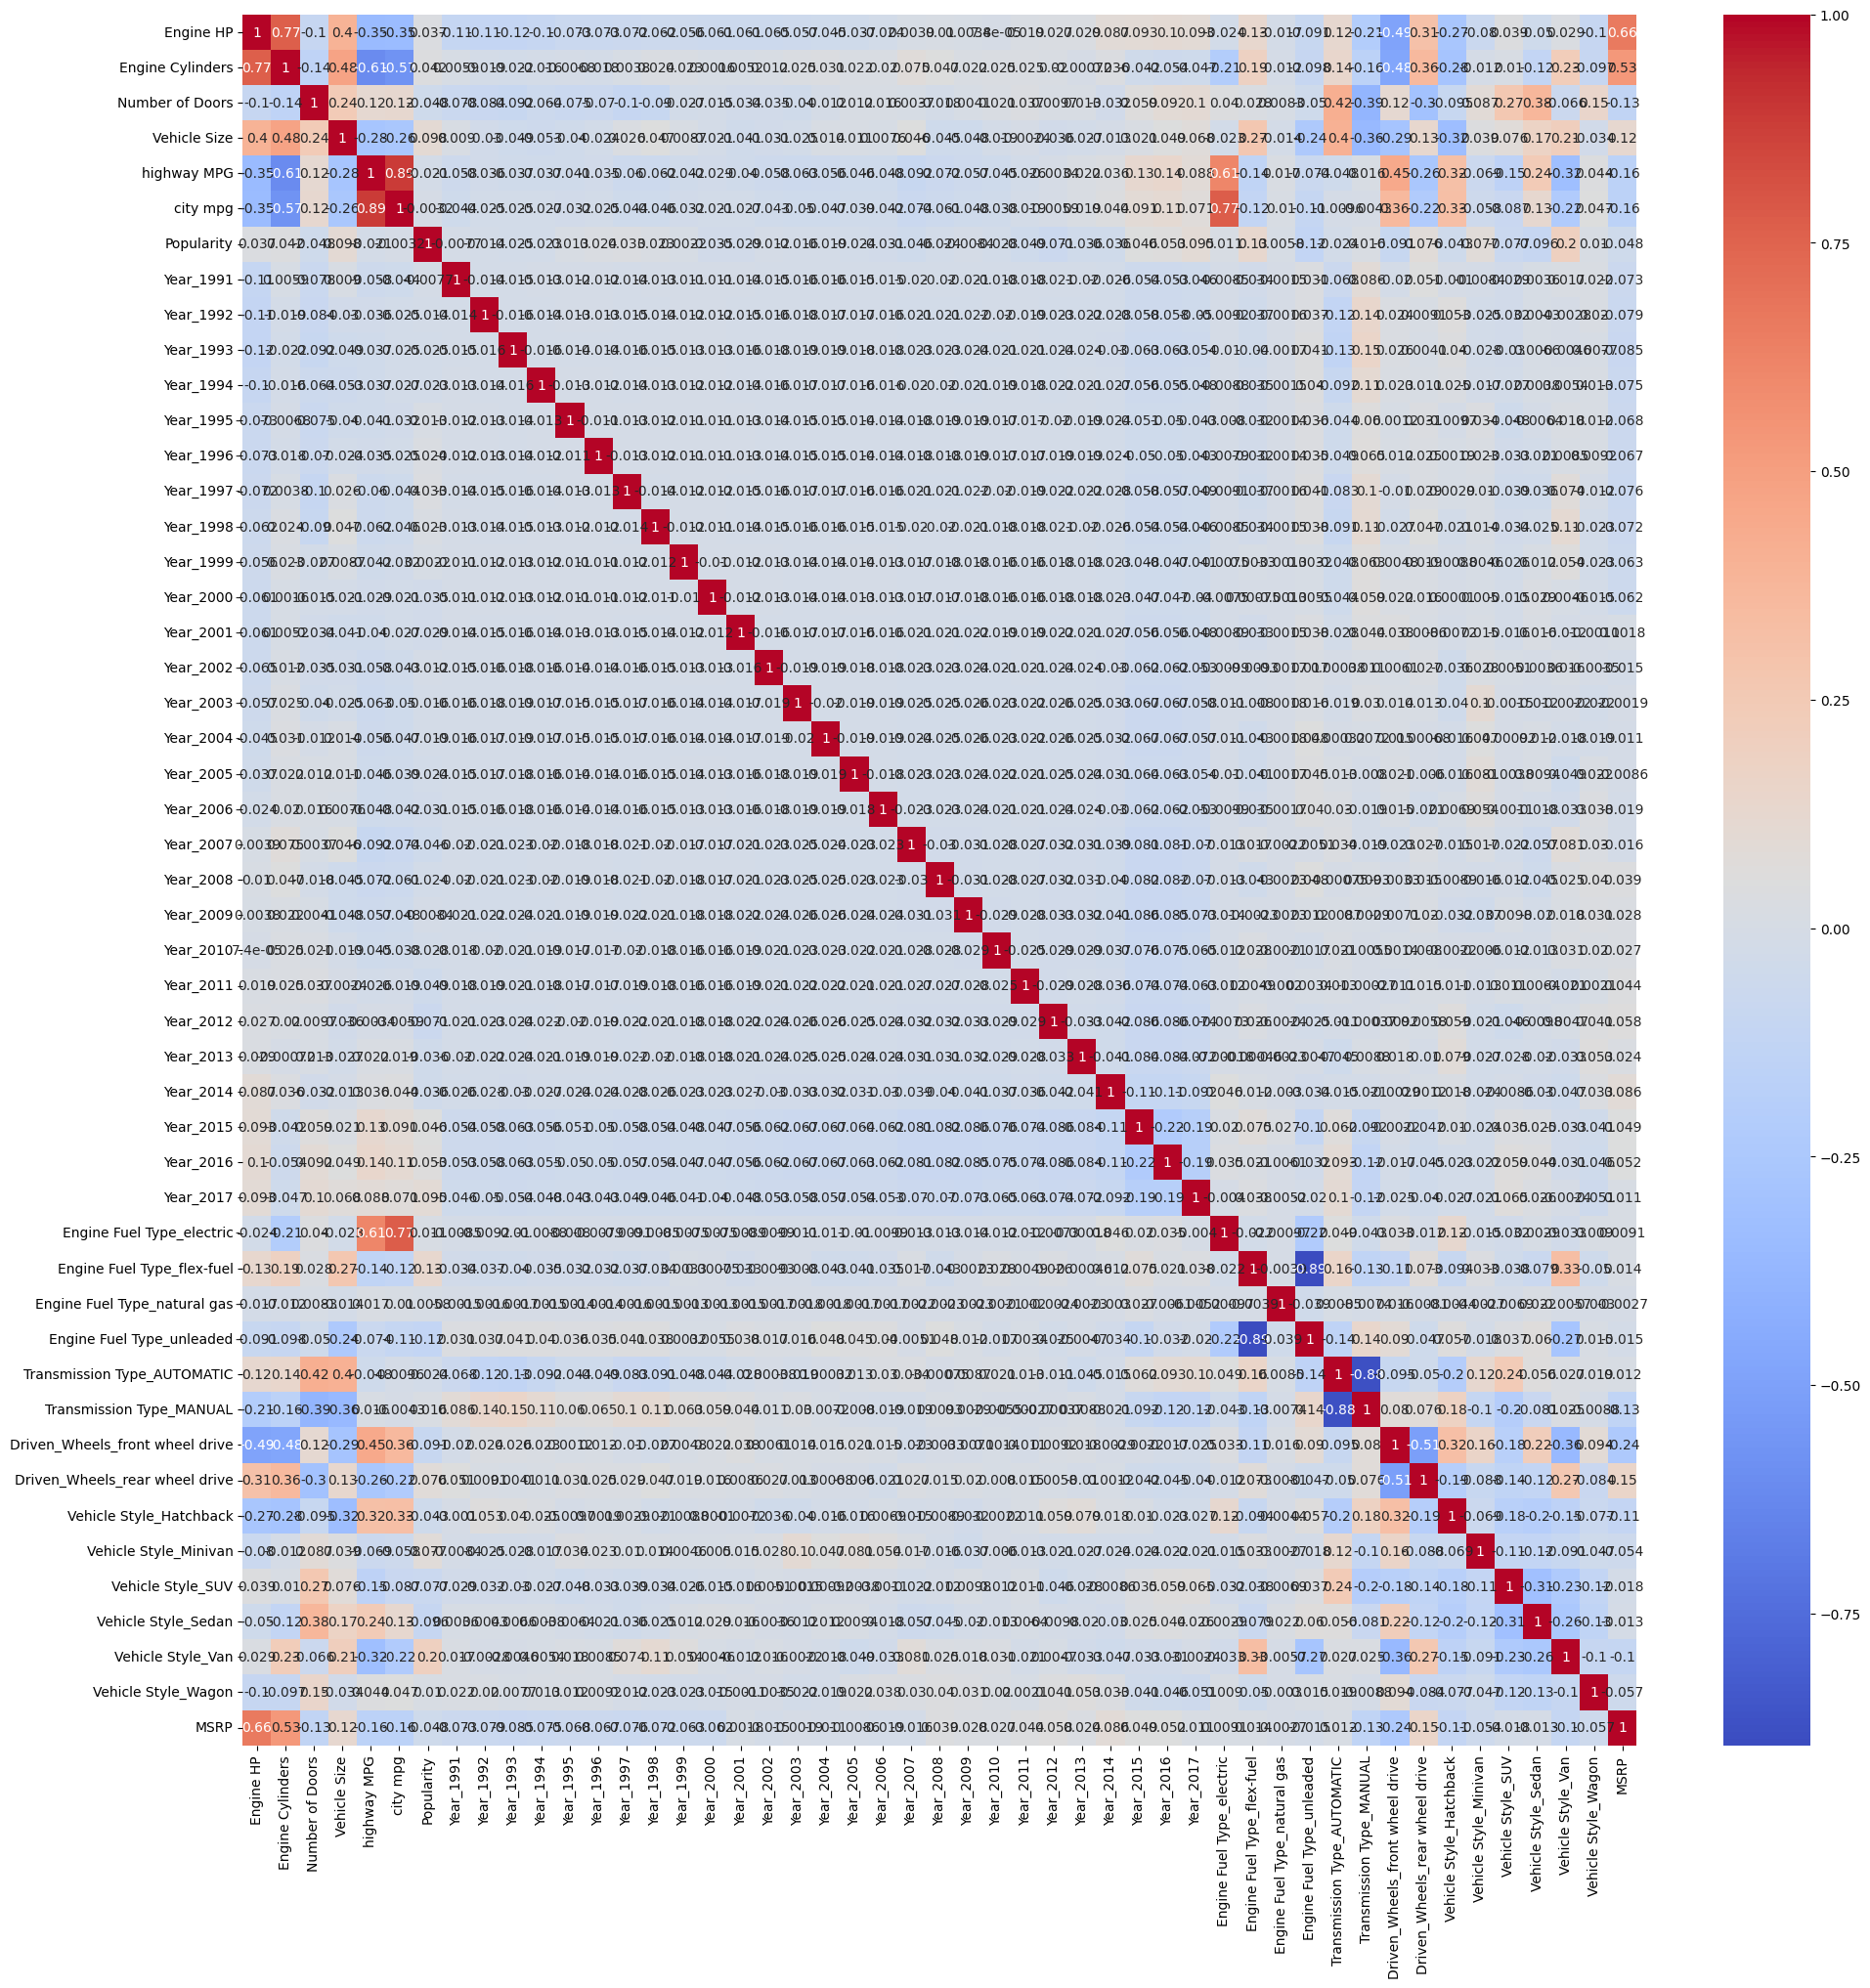

In [20]:
plt.figure(figsize=(23, 23))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


In [21]:
# Splitting the data into X and y

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [23]:
# Cross Validation

from sklearn.model_selection import cross_val_score

def cross_val(model):
    score = cross_val_score(model, X_train, y_train, cv=5)
    return score.mean()

# Making a list of models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Making a list of model name and model object

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("ElasticNet Regression", ElasticNet()),
    ("Decision Tree Regression", DecisionTreeRegressor()),
    ("Random Forest Regression", RandomForestRegressor()),
]




In [24]:
# Making a for loop to iterate over the models and print the cross validation score

for name, model in models:
    print(name, cross_val(model))

Linear Regression 0.5534632849546357
Ridge Regression 0.5536836599983197
Lasso Regression 0.5534798865814539
ElasticNet Regression 0.5231085873163746
Decision Tree Regression 0.8019767061692695
Random Forest Regression 0.9056995574106743
